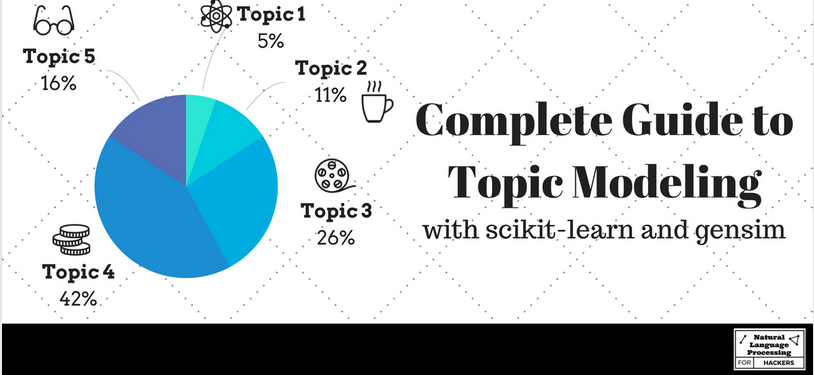

In [1]:
from IPython.display import Image
import os
Images = os.getcwd() + "\Images"
Image(filename= Images + '\TopicModeling-CompleteGuide.png')

# Complete Guide to Topic Modeling with scikit-learn and gensim

# What is Topic Modeling?

Topic modelling, in the context of Natural Language Processing, is described as a method of uncovering hidden structure in a collection of texts. Although that is indeed true it is also a pretty useless definition. Let’s define topic modeling in more practical terms.

Reference
- https://nlpforhackers.io/topic-modeling/


Definitions:

    C: collection of documents containing N texts.
    V: vocabulary (the set of unique words in the collection)
    
    
    
    
### Dimensionality Reduction

Topic modeling is a form of dimensionality reduction. Rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in V}, we can represent the text in its topic space as {Topic_i: weight(Topic_i, T) for Topic_i in Topics}. Notice that we’re using Topics to represent the set of all topics.


### Unsupervised Learning

Topic modeling can be easily compared to clustering. As in the case of clustering, the number of topics, like the number of clusters, is a hyperparameter. By doing topic modeling we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a certain weight.


### A Form of Tagging
If document classification is assigning a single category to a text, topic modeling is assigning multiple tags to a text. A human expert can label the resulting topics with human-readable labels and use different heuristics to convert the weighted topics to a set of tags.


## Why is Topic Modeling useful?

There are several scenarios when topic modeling can prove useful. Here are some of them:


Text classification – Topic modeling can improve classification by grouping similar words together in topics rather than using each word as a feature


Recommender Systems – Using a similarity measure we can build recommender systems. If our system would recommend articles for readers, it will recommend articles with a topic structure similar to the articles the user has already read.


Uncovering Themes in Texts – Useful for detecting trends in online publications for example


## Topic Modeling Algorithms

There are several algorithms for doing topic modeling. The most popular ones include

LDA – Latent Dirichlet Allocation – The one we’ll be focusing in this tutorial. Its foundations are Probabilistic Graphical Models

LSA or LSI – Latent Semantic Analysis or Latent Semantic Indexing – Uses Singular Value Decomposition (SVD) on the Document-Term Matrix. Based on Linear Algebra

NMF – Non-Negative Matrix Factorization – Based on Linear Algebra


Here are some things all these algorithms have in common:

- The number of topics (n_topics) as a parameter. None of the algorithms can infer the number of topics in the document collection (n_components).

- All of the algorithms have as input the Document-Word Matrix (or Document-Term Matrix). DWM[i][j] = The number of occurrences of word_j in document_i

- All of them output 2 matrices: WTM (Word Topic Matrix) and TDM (Topic Document Matrix). The matrices are significantly smaller and the result of their multiplication should be as close as possible to the original DWM matrix.


The purpose of this guide is not to describe in great detail each algorithm, but rather a practical overview and concrete implementations in Python using Scikit-Learn and Gensim. We’ll go over every algorithm to understand them better later in this tutorial. Next, we’re going to use Scikit-Learn and Gensim to perform topic modeling on a corpus.

## Using Gensim for Topic Modeling

We’re going to first study the gensim implementations because they offer more functionality out of the box and then we’ll replicate that functionality with sklearn. Let’s first prepare the dataset we’ll be working with.

In [2]:
from nltk.corpus import brown
 
data = []
 
for fileid in brown.fileids():
    document = ' '.join(brown.words(fileid))
    data.append(document)
 
NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)
print(data[:5])

500
[u"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `` to 

Gensim doesn’t have an implementation for NMF so we’re only going to play with LDA and LSI (Latent Semantic Indexing AKA Latent Semantic Analysis) models.

In [4]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
 
NUM_TOPICS = 10
STOPWORDS = stopwords.words('english')
 
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# For gensim we need to tokenize the data and filter out stopwords
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))
 
 
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
 
# Have a look at how the 20th document looks like: [(word_id, count), ...]
print(corpus[20])
# [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...
 
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 

[(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2), (44, 2), (45, 2), (46, 2), (47, 2), (49, 1), (50, 1), (53, 1), (56, 1), (59, 1), (60, 1), (66, 1), (75, 1), (80, 1), (98, 1), (101, 1), (106, 1), (117, 1), (129, 1), (130, 2), (132, 2), (135, 2), (140, 1), (141, 2), (143, 4), (144, 2), (145, 2), (166, 1), (195, 1), (198, 3), (219, 1), (220, 4), (221, 3), (223, 1), (229, 4), (230, 4), (231, 2), (235, 1), (236, 1), (242, 2), (246, 2), (255, 1), (263, 1), (269, 1), (270, 5), (271, 2), (275, 5), (276, 1), (278, 4), (280, 2), (281, 1), (307, 2), (310, 1), (311, 3), (313, 1), (314, 5), (318, 4), (322, 1), (336, 1), (338, 3), (339, 1), (340, 1), (341, 1), (345, 1), (346, 1), (351, 1), (354, 1), (355, 1), (366, 3), (368, 13), (370, 1), (372, 1), (374, 3), (377, 3), (381, 3), (386, 1), (392, 6), (396, 1), (401, 1), (412, 2), (426, 2), (428, 2), (431, 2), (434, 2), (439, 2), (444, 1), (450, 1), (452, 1), (462, 1), (465, 1), (467, 1), (470, 1), (478, 1), (483, 1), (

Let’s now display the topics the two models have inferred

In [5]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
 
print("=" * 20)

LDA Model:
('Topic #0:', u'0.005*"one" + 0.004*"said" + 0.004*"may" + 0.003*"would" + 0.003*"could" + 0.002*"like" + 0.002*"new" + 0.002*"man" + 0.002*"first" + 0.002*"two"')
('Topic #1:', u'0.007*"one" + 0.003*"would" + 0.003*"two" + 0.003*"new" + 0.003*"time" + 0.003*"may" + 0.003*"said" + 0.003*"could" + 0.002*"must" + 0.002*"like"')
('Topic #2:', u'0.006*"one" + 0.005*"would" + 0.003*"time" + 0.002*"could" + 0.002*"new" + 0.002*"may" + 0.002*"also" + 0.002*"man" + 0.002*"two" + 0.002*"like"')
('Topic #3:', u'0.006*"one" + 0.005*"would" + 0.003*"man" + 0.003*"could" + 0.003*"may" + 0.003*"new" + 0.003*"time" + 0.003*"two" + 0.003*"first" + 0.002*"said"')
('Topic #4:', u'0.008*"one" + 0.006*"would" + 0.004*"could" + 0.004*"said" + 0.004*"time" + 0.003*"new" + 0.003*"two" + 0.002*"man" + 0.002*"made" + 0.002*"first"')
('Topic #5:', u'0.005*"one" + 0.004*"would" + 0.004*"new" + 0.003*"first" + 0.003*"time" + 0.003*"could" + 0.003*"may" + 0.002*"like" + 0.002*"years" + 0.002*"said"')
('

Let’s now put the models to work and transform unseen documents to their topic distribution:

In [6]:
text = "The economy is working better than ever"
bow = dictionary.doc2bow(clean_text(text))
 
print(lsi_model[bow])

print ("\n\n\n")
print(lda_model[bow])

[(0, 0.09161389299585689), (1, -0.008762853310049326), (2, 0.01613286213858174), (3, 0.04026336690780774), (4, 0.014578377492087444), (5, 0.011423014539875157), (6, 0.028129940524853195), (7, -0.018143189567433354), (8, 0.05604605882569812), (9, -0.024015039294096353)]




[(0, 0.02000537), (1, 0.020006975), (2, 0.020006292), (3, 0.020005312), (4, 0.020005276), (5, 0.020005634), (6, 0.02000574), (7, 0.81994885), (8, 0.02000532), (9, 0.02000524)]


The LDA result can be interpreted as a distribution over topics. Let’s take an example:

[(0, 0.020229582), (1, 0.48642197), (2, 0.020894188), (3, 0.020058075), (4, 0.022410348), (5, 0.025939714), (6, 0.20046122), (7, 0.13457063), (8, 0.048185956), (9, 0.02082831)]. This result suggests that topic 1 has the strongest representation in this text.

Gensim offers a simple way of performing similarity queries using topic models.

In [7]:
from gensim import similarities
 
lda_index = similarities.MatrixSimilarity(lda_model[corpus])
 
# Let's perform some queries
similarities = lda_index[lda_model[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])
# [(104, 0.87591344), (178, 0.86124849), (31, 0.8604598), (77, 0.84932965), (85, 0.84843522), (135, 0.84421808), (215, 0.84184396), (353, 0.84038532), (254, 0.83498049), (13, 0.82832891)]
 
# Let's see what's the most similar document
document_id, similarity = similarities[0]
print(data[document_id][:1000])

C:\Users\bbrock\Anaconda2\envs\py27_text_analytics\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(480, 0.9981521), (242, 0.99814725), (483, 0.99790275), (459, 0.997853), (139, 0.9978371), (203, 0.9976287), (478, 0.99762845), (426, 0.99762714), (369, 0.9975825), (178, 0.99756974)]
I don't really believe in intuition . But I swear to you from the moment I opened my eyes , I knew it was going to be a bad day . Part of it was the weather , so foggy it would take me twice as long to get to the hospital . Part of it was being so tired -- I'd not only had my usual full day yesterday , but a dinner meeting as well , that kept me up late . But the rest of it , the main part , wasn't based on logic at all . It was just going to be one of those days . For the thousandth time , I wished I'd chosen some nice , nine-to-five , five-days-a-week profession . And for the thousandth time , I answered myself . I hadn't chosen medicine -- it had chosen me . Actually , I shouldn't complain , I told myself in the shaving mirror . I had a lot to be thankful for . A profession that brought me as good an 

## Using Scikit-Learn for Topic Modeling

Let’s now go through the same process with sklearn. This librabry offers a NMF implementation as well. The algorithms are more bare-bones than what we’ve seen with gensim but on the plus side, they implement the fit/transform interface we’re used with:

In [8]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
 
# Let's see how the first document in the corpus looks like in different topic spaces
print("\n")
print(lda_Z[0])
print("\n")
print(nmf_Z[0])
print("\n")
print(lsi_Z[0])

C:\Users\bbrock\Anaconda2\envs\py27_text_analytics\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(500L, 10L)
(500L, 10L)
(500L, 10L)


[1.05603595e-04 1.05600627e-04 2.62483193e-01 1.05610915e-04
 1.05598857e-04 1.91379672e-01 1.05615588e-04 5.45397875e-01
 1.05619633e-04 1.05610011e-04]


[0.         0.         2.11557902 0.07688488 0.         0.54291754
 1.06468094 0.         0.         0.24602477]


[ 2.33068424e+01  1.59484961e+00  2.18299529e+01 -1.34427132e-02
  9.06324599e-01  1.16296274e+01  3.95788453e+00 -1.80698058e+00
  1.38320369e+00 -1.45051035e+01]


In order to inspect the inferred topics we need to implement a print function ourselves:

In [9]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)
 
print("NMF Model:")
print_topics(nmf_model, vectorizer)
print("=" * 20)
 
print("LSI Model:")
print_topics(lsi_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 0:
[(u'library', 27.2441159285987), (u'libraries', 19.693285340753324), (u'formula', 17.17297268054053), (u'version', 14.514460560249708), (u'chamber', 14.415380912828153), (u'volume', 13.429386935217554), (u'engine', 12.505202788623073), (u'displacement', 10.675135421655177), (u'headquarters', 10.657132092439282), (u'model', 10.131485982178287)]
Topic 1:
[(u'phil', 59.714149105278416), (u'mike', 28.382380433289164), (u'eddie', 26.440956483986835), (u'ball', 23.721445588766574), (u'league', 18.275341513511034), (u'catcher', 17.79905719137618), (u'game', 17.040812967171473), (u'pitcher', 14.576896360117335), (u'runs', 12.716105132409364), (u'hits', 9.84142761569252)]
Topic 2:
[(u'new', 498.3214021810296), (u'world', 358.72446633347386), (u'state', 334.5143222484575), (u'people', 328.6388272294959), (u'american', 302.69924370726824), (u'social', 298.07233174917144), (u'states', 296.89859560857116), (u'united', 277.17003282270406), (u'war', 263.4405600084588), (u'presiden

[(u'state', 0.433297857363704), (u'mrs', 0.26759442401779), (u'form', 0.20651496390966945), (u'dictionary', 0.17791776981329926), (u'information', 0.1573414454076609), (u'text', 0.13302858765948372), (u'federal', 0.1208284558849548), (u'forms', 0.11995366061130106), (u'cell', 0.11818300144926973), (u'law', 0.10436137243312267)]
Topic 7:
[(u'united', 0.2769500572941697), (u'states', 0.23722637770820915), (u'shall', 0.19701222377644104), (u'mrs', 0.18462997470686981), (u'government', 0.1723685692361841), (u'school', 0.15914827717658492), (u'section', 0.1261834873920134), (u'act', 0.11868003860185405), (u'agreement', 0.11448607580428147), (u'information', 0.09943976456154624)]
Topic 8:
[(u'form', 0.32096128985356553), (u'dictionary', 0.2995012387713441), (u'information', 0.2920229913007291), (u'text', 0.22626909028635775), (u'cell', 0.1899548105565117), (u'forms', 0.18706609964838355), (u'year', 0.18575835206125174), (u'tax', 0.1611459221165205), (u'fiscal', 0.13639570533623568), (u'list'

Transforming an unseen document goes like this:

In [10]:
text = "The economy is working better than ever"
x = nmf_model.transform(vectorizer.transform([text]))[0]
print(x)

[0.00290057 0.         0.         0.         0.         0.00438806
 0.         0.         0.         0.00466347]


Here’s how to implement the similarity functionality we’ve seen in the gensim section:

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
 
def most_similar(x, Z, top_n=5):
    dists = euclidean_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    return most_similar
 
similarities = most_similar(x, nmf_Z)
document_id, similarity = similarities[0]
print(data[document_id][:1000])

Livery stable -- J. Vernon , prop. '' . Coaching had declined considerably by 1905 , but the sign was still there , near the old Wells Fargo building in San Francisco , creaking in the fog as it had for thirty years . John Vernon had had all the patronage he cared for -- he had prospered , but he could not retire from horsedom . Coaching was in his blood . He had two interests in life : the pleasures of the table and driving . Twice a week he drove his tallyho over the Santa Cruz road , upland and through the redwood forest , with orchards below him at one hand , and glimpses of the Pacific at the other . The journey back he made along the coast road , traveling hell-for-leather , every lantern of the tallyho ablaze . The southward route was the classic run in California , and the most fashionable . His patronage on this stretch was made up largely of San Franciscans -- regulars , most of them , and trenchermen like himself . They did not complain at the inhuman hour of starting ( seve

## Plotting words and documents in 2D with SVD

We can use SVD with 2 components (topics) to display words and documents in 2D. The process is really similar. Let’s start with displaying documents since it’s a bit more straightforward.

In case you are running this in a Jupyter Notebook, run the following lines to init bokeh:

In [12]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

Let’s plot documents in 2D:

In [13]:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(data_vectorized)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(data))
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

You can try going through the documents to see if indeed closer documents on the plot are more similar. To display words in 2D we just need to transpose the vectorized data: words_2d = svd.fit_transform(data_vectorized.T).

In [14]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

To get a really good word representation we need a significantly larger corpus. Even with this corpus, if we zoom around a bit, we can find some meaningful representations:

In [15]:
show(plot, notebook_handle=True)

## More about Latent Dirichlet Allocation

LDA is the most popular method for doing topic modeling in real-world applications. That is because it provides accurate results, can be trained online (do not retrain every time we get new data) and can be run on multiple cores. Let’s repeat the process we did in the previous sections with sklearn and LatentDirichletAllocation:

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
 
text = "The economy is working better than ever"
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

C:\Users\bbrock\Anaconda2\envs\py27_text_analytics\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(array([0.77496054, 0.02500721, 0.02500788, 0.0250101 , 0.02500147,
       0.02500216, 0.02500038, 0.02500129, 0.02500647, 0.0250025 ]), 1.0000000000000002)


Notice how the factors corresponding to each component (topic) add up to 1. That’s not a coincidence. Indeed, LDA considers documents as being generated by a mixture of the topics. The purpose of LDA is to compute how much of the document was generated by which topic. In this example, more than half of the document has been generated by the second topic:

LDA is an iterative algorithm. Here are the two main steps:

   - In the initialization stage, each word is assigned to a random topic.
   - Iteratively, the algorithm goes through each word and reassigns the word to a topic taking into consideration:
        - What’s the probability of the word belonging to a topic
        - What’s the probability of the document to be generated by a topic

Due to these important qualities, we can visualize LDA results easily. We’re going to use a specialized tool called PyLDAVis:

In [17]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\bbrock\Anaconda2\envs\py27_text_analytics\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      33.484907        1       1 -333.634949 -356.828491
8      32.579657        1       2  -34.324734  137.018616
0      16.884292        1       3 -361.469452  -31.376978
1       7.886192        1       4 -370.400726  295.154999
5       5.367141        1       5    0.437851 -496.968109
4       1.197777        1       6  317.140869 -320.587860
7       0.988913        1       7  280.338165  332.166809
2       0.763802        1       8  310.557892    6.463682
6       0.529823        1       9  -54.139194  471.909943
9       0.317498        1      10  -17.430696 -161.964050, topic_info=      Category         Freq       Term        Total  loglift  logprob
term                                                                 
6251   Default  1586.000000        new  1586.000000  30.0000  30.0000
5692   Default  1286.000000        man  1286.000000  29.0000  29.0000
6115   Default   489.000000        mrs   489.000000  28.0000  28.0000
4184   Default   307.000000        god   307.000000  27.0000  27.0000
4196   Default   755.000000       good   755.000000  26.0000  26.0000
9683   Default  1541.000000       time  1541.000000  25.0000  25.0000
8177   Default  1955.000000       said  1955.000000  24.0000  24.0000
5473   Default   681.000000       life   681.000000  23.0000  23.0000
10539  Default   771.000000      world   771.000000  22.0000  22.0000
10104  Default   608.000000       used   608.000000  21.0000  21.0000
5187   Default   379.000000       john   379.000000  20.0000  20.0000
4263   Default   630.000000      great   630.000000  19.0000  19.0000
2435   Default   258.000000      death   258.000000  18.0000  18.0000
1605   Default   189.000000      class   189.000000  17.0000  17.0000
3690   Default   268.000000       feet   268.000000  16.0000  16.0000
5576   Default   723.000000       long   723.000000  15.0000  15.0000
5232   Default   842.000000       just   842.000000  14.0000  14.0000
6140   Default   199.000000      music   199.000000  13.0000  13.0000
10595  Default   690.000000       year   690.000000  12.0000  12.0000
5681   Default   763.000000       make   763.000000  11.0000  11.0000
2416   Default   687.000000        day   687.000000  10.0000  10.0000
10527  Default   735.000000       work   735.000000   9.0000   9.0000
6431   Default   643.000000        old   643.000000   8.0000   8.0000
10348  Default   439.000000      water   439.000000   7.0000   7.0000
9010   Default   832.000000      state   832.000000   6.0000   6.0000
928    Default   334.000000       best   334.000000   5.0000   5.0000
10103  Default   576.000000        use   576.000000   4.0000   4.0000
8271   Default   487.000000     school   487.000000   3.0000   3.0000
7303   Default   384.000000    program   384.000000   2.0000   2.0000
2906   Default   459.000000       does   459.000000   1.0000   1.0000
...        ...          ...        ...          ...      ...      ...
7331   Topic10     1.421171     prompt     9.897304   3.8117  -6.7780
1257   Topic10     1.478549       byrd    10.636987   3.7792  -6.7384
9141   Topic10     1.378684  strenuous     9.979715   3.7730  -6.8083
5811   Topic10     0.956709    meadows     6.980961   3.7650  -7.1737
5212   Topic10     1.811038     judged    13.608556   3.7357  -6.5356
9883   Topic10     0.912776    trotted     7.143132   3.6950  -7.2207
4048   Topic10     2.167454       fury    17.439450   3.6673  -6.3559
2397   Topic10     1.331718     daring    10.941132   3.6464  -6.8430
6573   Topic10     1.339144      paced    11.029966   3.6439  -6.8374
5971   Topic10     0.890722   miracles     7.777024   3.5856  -7.2452
8960   Topic10     2.913484     stable    26.817407   3.5328  -6.0601
1605   Topic10    15.422897      class   189.657644   3.2431  -4.3936
5930   Topic10     4.004859       mile    43.918857   3.3576  -5.7420
8042   Topic10     3.844718       ring   

Let’s interpret the topic visualization. Notice how topics are shown on the left while words are on the right. Here are the main things you should consider:

    1) Larger topics are more frequent in the corpus.
    2) Topics closer together are more similar, topics further apart are less similar.
    3) When you select a topic, you can see the most representative words for the selected topic. This measure can be a combination of how frequent or how discriminant the word is. You can adjust the weight of each property using the slider.
    4) Hovering over a word will adjust the topic sizes according to how representative the word is for the topic.


As we mentioned before, LDA can be used for automatic tagging. We can go over each topic (pyLDAVis helps a lot) and attach a label to it. In the screenshot above you can see that the topic is mainly about Education. In the next example, we can see that this topic is mostly about Music. You can try doing this for all the topics. Unfortunately, not all topics are so clearly defined as the ones we looked at. Results can be improved by experimenting with different num_topics values. In this case, our corpus is not really that large, it only has 500 instances. A larger corpus will induce more clearly defined topics.
